##Основное задание

In [1]:
from PIL import Image, ImageOps
import numpy as np

In [2]:
files=['A.png','L.png','E.png','K.png','C.png','N.png','D.png','R.png', 'D_noise.png']

In [3]:
S=[]
T=[]
for f in range(len(files)):

  img = Image.open(files[f])
  img = ImageOps.grayscale(img)
  numpy_array = np.array(img)
  numpy_array=numpy_array.flatten()
  numpy_array=numpy_array.astype(int)
  for i in range(len(numpy_array)):
    if numpy_array[i]>=128:
      numpy_array[i]=-1
    else:
      numpy_array[i]=1
  S.append(numpy_array)

  width, height = img.size
  left = 0
  top = height/2
  right = width
  bottom = height
  img = img.crop((left, top, right, bottom))
  numpy_array = np.array(img)
  numpy_array=numpy_array.flatten()
  numpy_array=numpy_array.astype(int)
  for i in range(len(numpy_array)):
    if numpy_array[i]>=128:
      numpy_array[i]=-1
    else:
      numpy_array[i]=1
  T.append(numpy_array)

In [4]:
l=len(S)
n=len(S[0])
m=len(T[0])

In [5]:
w = [[0] * m for _ in range(n)]

In [6]:
def f_act(U):
    if U > 0:
        return 1
    elif U == 0:
        return U
    else:
        return -1

In [7]:
def compare():
    for i in range (n):
      if Xlayt3[i]!=Xlayt1[i]:
        return False
    for i in range (m):
      if Ylayt2[i]!=Ylayt0[i]:
        return False
    return True

In [8]:
def calculate_y():
    vector=[Xlay[i][1] for i in range (len(Xlay))]
    result=np.dot(vector,w)

    global Ylayt2
    global Ylayt0
    Ylayt0=Ylayt2[:]
    Ylayt2=[]

    for j in range(m):
      Ylay[j][0]=result[j]
      Ylay[j][1]=f_act(Ylay[j][0])
      Ylayt2.append(Ylay[j][1])

In [9]:
def calculate_x():
    vector=[Ylay[j][1] for j in range (len(Ylay))]
    result=np.dot(vector,wt)

    global Xlayt3
    global Xlayt1
    Xlayt1=Xlayt3[:]
    Xlayt3=[]

    for i in range(n):
      Xlay[i][0]=result[i]
      Xlay[i][1]=f_act(Xlay[i][0])
      Xlayt3.append(Xlay[i][1])

In [10]:
def compare_final(spisok1, spisok2):
  np_spisok1=np.array(spisok1)
  np_spisok2=np.array(spisok2)
  spisok3=np_spisok1==np_spisok2
  spisok3=spisok3.astype(int)
  print(spisok3.sum()/len(spisok3))

In [11]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [12]:
for i in range(n):
    for j in range(m):
        for p in range(l):
            w[i][j] += S[p][i] * T[p][j]

w = np.array(w)
wt = w.T

In [13]:
Xlay = []
Ylay = []
Xlayt1=[]
Xlayt3=[]
Ylayt0=[]
Ylayt2=[]

In [14]:
for p in range(l):
  Xlay = []
  Ylay = []
  Xlayt1=[]
  Xlayt3=[]
  Ylayt0=[]
  Ylayt2=[]
  for i in range(n):
      Xlay.append([0, f_act(0)])

  for i in range(m):
      Ylay.append([0, f_act(0)])
      Ylayt0.append(Ylay[i][1])

  for i in range (n):
    Xlay[i][0]=S[p][i]
    Xlay[i][1]=f_act(Xlay[i][0])
    Xlayt3.append(Xlay[i][1])

  calculate_y()

  finish=False

  while not finish:
    calculate_x()
    calculate_y()
    finish=compare()

  vector=[]
  for j in range (len(Ylay)):
    vector.append(Ylay[j][1])
  compare_final(vector,T[p])

0.841796875
0.91015625
0.873046875
0.923828125
0.81640625
0.861328125
0.734375
0.888671875
0.76953125


##Исследование зашумленного изображения

In [15]:
img = Image.open('D_noise.png')
S_n=[]
T_n=[]
img = ImageOps.grayscale(img)
numpy_array = np.array(img)
numpy_array=numpy_array.flatten()
numpy_array=numpy_array.astype(int)
for i in range(len(numpy_array)):
  if numpy_array[i]>=128:
    numpy_array[i]=-1
  else:
    numpy_array[i]=1
S_n.append(numpy_array)

width, height = img.size
left = 0
top = 0
right = width/2
bottom = height
img = img.crop((left, top, right, bottom))
numpy_array = np.array(img)
numpy_array=numpy_array.flatten()
numpy_array=numpy_array.astype(int)
for i in range(len(numpy_array)):
  if numpy_array[i]>=128:
    numpy_array[i]=-1
  else:
    numpy_array[i]=1
T_n.append(numpy_array)

In [16]:
Xlay = []
Ylay = []
Xlayt1=[]
Xlayt3=[]
Ylayt0=[]
Ylayt2=[]
for i in range(n):
    Xlay.append([0, f_act(0)])

for i in range(m):
    Ylay.append([0, f_act(0)])
    Ylayt0.append(Ylay[i][1])

for i in range (n):
  Xlay[i][0]=S_n[0][i]
  Xlay[i][1]=f_act(Xlay[i][0])
  Xlayt3.append(Xlay[i][1])

calculate_y()

finish=False

while not finish:
  calculate_x()
  calculate_y()
  finish=compare()

vector=[]
for j in range (len(Ylay)):
  vector.append(Ylay[j][1])
print(Ylay)
compare_final(vector,T_n[0])


[[-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-4866, -1], [-1214, -1], [46, 1], [6218, 1], [2486, 1], [2486, 1], [1226, 1], [-1822, -1], [-1822, -1], [-1822, -1], [-1822, -1], [-1822, -1], [-1822, -1], [-562, -1], [1818, 1], [302, 1], [-1026, -1], [-1026, -1], [-3406, -1], [-4946, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-4866, -1], [-1214, -1], [46, 1], [6218, 1], [2486, 1], [1226, 1], [-1798, -1], [-3338, -1], [-3338, -1], [-3338, -1], [-3338, -1], [-1822, -1], [-1822, -1], [-562, -1], [1818, 1], [210, 1], [234, 1], [-1026, -1], [-3406, -1], [-4946, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-6218, -1], [-2486, -1], [-1214, -1], [46, 1], [6218, 1], [1214, 1], [-46, -1], [-4610, -1], [-4610, -1], [-4610, -1], [-4610

##Дополнительный код для исследования изображений

In [17]:
(S[0]==S[1]).all()

False

In [18]:
vector2=np.array(vector)
vector2 = np.reshape(vector2, (-1, 32))
PIL_image = Image.fromarray(np.uint8(vector2)).convert('RGB')
PIL_image

In [19]:
vector2=np.array(T[1])
vector2 = np.reshape(vector2, (-1, 32))
PIL_image = Image.fromarray(np.uint8(vector2)).convert('RGB')
PIL_image

In [20]:
print(len(T[2]))

512


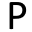

In [21]:
im = Image.open("R.png")
im

In [22]:
width, height = im.size
left = 0
top = 0
right = width/2
bottom = height
im = im.crop((left, top, right, bottom))
im